In [32]:
import numpy as np
import pandas as pd
from statistics import mean
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
df = pd.read_csv('dataset_FLD.csv',index=False)

In [74]:
df.columns = ['x1','x2','x3','y']

In [ ]:
pos_ind = df[df['y']==1].index.tolist()
neg_ind = df[df['y']==0].index.tolist()
y = df[['y']].to_numpy()
y

In [35]:
#creating the 3D dataset

pos_df=df.iloc[pos_ind,:]
neg_df=df.iloc[neg_ind,:]

pos_list_x1=pos_df['x1'].tolist()
pos_list_x2=pos_df['x2'].tolist()
pos_list_x3=pos_df['x3'].tolist()

neg_list_x1=neg_df['x1'].tolist()
neg_list_x2=neg_df['x2'].tolist()
neg_list_x3=neg_df['x3'].tolist()

#pos_list_x1

In [37]:
#we proceed through the whole process in five different steps

#1.Finding the means of the classes
#2.Finding Sw
#3.We find W 
#4.Projecting the points on to the 1D space using W
#5.We plot the guassian curves to find out the intersection point (the threshold)

##Finding the means 

In [38]:
#We generate m1 and m2 (The mean location of the two classes)
m1 = np.array([np.mean(pos_list_x1),np.mean(pos_list_x2),np.mean(pos_list_x3)])
m2 = np.array([np.mean(neg_list_x1),np.mean(neg_list_x2),np.mean(neg_list_x3)])
#m1 = np.array(m1)
m1 = m1[:,None]
m2 = m2[:,None]
m1


array([[0.22310309],
       [0.00255859],
       [1.01027072]])

##Finding Sw

In [ ]:
param = df.to_numpy()
#x1,x2,x3 constitute the X array
X = param[:,0:3]

#y constitutes the Y array
Y = param[:,3:4]
#we initialise the Sw matrix
Sw=np.array(np.zeros((len(X[0]) , len(X[0]))))

#we now calculate the Sw matrix

for i in range(0,len(X)):
    xn=X[i]
    #print(xn)
    xn=xn[:,None]
    #print(xn)    
    if(Y[i] == 1) : #positive class
        temp = (xn-m1).dot((xn-m1).T)
    elif(Y[i]== 0) : #negative class 
        temp = (xn-m2).dot((xn-m2).T)
    Sw+=temp

Sw_inv= np.linalg.inv(Sw)
Sw
print(y)

##Calculating W

In [40]:
W=Sw_inv.dot(m2-m1)
W

array([[ 0.00014985],
       [ 0.00041548],
       [-0.02263567]])

## Projecting on to the 1D space

In [88]:
#now we project this onto a 1D space
#we create an empty array to contain the 1D projected points
X_1d = [];
print(W)
#We calculate its projection onto 1D space
for i in range(0,len(X)):
    xn = X[i]
    xn = xn[:,None]
    proj = W.T.dot(X[i])
    X_1d.append(float(proj))


[[ 0.00014985]
 [ 0.00041548]
 [-0.02263567]]


In [42]:
# matplotlib histogram
p_ind=[index for index, element in enumerate(Y) if element == 1]
n_ind=[index for index, element in enumerate(Y) if element == 0]

pos_points=[X_1d[i] for i in p_ind]
neg_points=[X_1d[i] for i in n_ind]
sig1=statistics.stdev(pos_points)
mu1=mean(pos_points)
sig2=statistics.stdev(neg_points)
mu2=mean(neg_points)

##Plotting the Gaussian curves to find the threshold

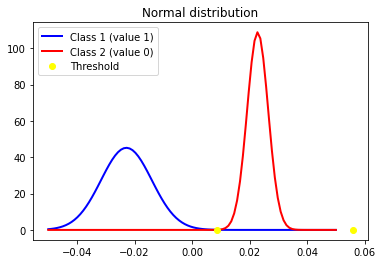

0.008800972637059897


In [71]:
def solve(m1,m2,std1,std2):
    a = 1/(2*std1**2) - 1/(2*std2**2)
    b = m2/(std2**2) - m1/(std1**2)
    c = m1**2 /(2*std1**2) - m2**2 / (2*std2**2) - np.log(std2/std1)
    return np.roots([a,b,c])

result = solve(mu1,mu2,sig1,sig2)


# Fit a normal distribution to the data:
mu1, std1 = norm.fit(pos_points)
mu2, std2 = norm.fit(neg_points)

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(-0.05, 0.05, 100)
p1 = norm.pdf(x, mu1, std1)
p2 = norm.pdf(x, mu2, std2)
plt.plot(x, p1, 'k', linewidth=2,c='blue',label='Class 1 (value 1)')
plt.plot(x, p2, 'k', linewidth=2,c='red',label='Class 2 (value 0)')
plt.plot(result,norm.pdf(result,mu1,std1),'o',c='yellow',label='Threshold')

title = "Normal distribution"
plt.title(title)
plt.legend(loc = 'upper left')
plt.show()
print(result[1])
sep2 = result[1]

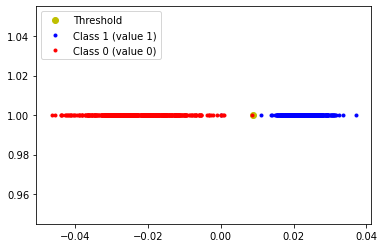

In [120]:
#Projecting onto vecto w
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline
color=['blue','red','black']
labels=['positive','negative','centroid']
  
X_1d=[]# Points projected onto one dimension
fig = plt.figure()


mod_w=np.linalg.norm(W) #mod of w
w2=mod_w ** 2
plt.plot([result[1]], [1], 'o', color='y',label='Threshold')
plt.plot([0],[1], '.', color='b', label='Class 1 (value 1)')
plt.plot([0],[1], '.', color='r', label='Class 0 (value 0)')
plt.legend(loc = 'upper left')

for i in range(0,len(X)):
    xn = X[i]
    yn=Y[i]
    xn = xn[:,None]
    projection = W.T.dot(X[i])   
    point= (projection/w2)* W
    if (yn==0) :
        plt.plot(projection, np.ones(projection.shape), '.', color='b', label='Class 1 (value 1)')
    elif (yn==1) :
        plt.plot(projection, np.ones(projection.shape), '.', color='r', label='Class 0 (value 0)')


In [45]:
import numpy as np

def solve(m1,m2,std1,std2):
    a = 1/(2*std1**2) - 1/(2*std2**2)
    b = m2/(std2**2) - m1/(std1**2)
    c = m1**2 /(2*std1**2) - m2**2 / (2*std2**2) - np.log(std2/std1)
    return np.roots([a,b,c])

result = solve(mu1,mu2,sig1,sig2)

discriminant = 0
greater_mean=max(mu1,mu2)
lesser_mean=min(mu1,mu2)
if (len(result)==1):
    discriminant=result[0]
elif (result[0] >=lesser_mean and result[0]<=greater_mean):
    discriminant = result[0]
elif (result[1] >=lesser_mean and result[1]<=greater_mean):
    discriminant = result[1]

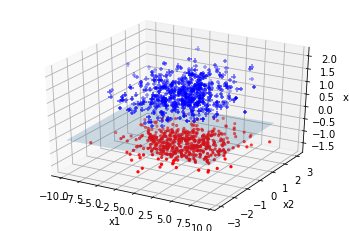

In [48]:
px = np.array(pos_list_x1)
py = np.array(pos_list_x2)
pz = np.array(pos_list_x3)
nx = np.array(neg_list_x1)
ny = np.array(neg_list_x2)
nz = np.array(neg_list_x3)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xx, yy = np.meshgrid(range(-10,10),range(-3,3))
z = (-W[0]*xx-W[1]*yy+sep2)*1. /W[2]
ax.plot_surface(xx,yy,z,alpha=0.2)
ax.scatter(px, py, pz, c='b', marker='+')
ax.scatter(nx, ny, nz, c='r', marker='.')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')

plt.show()

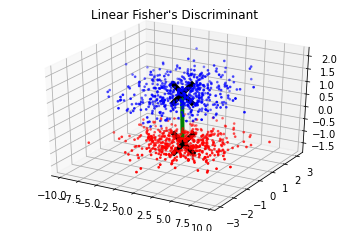

In [96]:
from mpl_toolkits import mplot3d 
import numpy as np 
import matplotlib.pyplot as plt 
  
fig = plt.figure()
 
ax.set_xlim3d(0, 1000)
ax.set_ylim3d(0, 1000)
ax.set_zlim3d(0, 1000)
 
color=['blue','red','black']
labels=['positive','negative','centroid']
  
# syntax for 3-D projection 
ax = plt.axes(projection ='3d') 
 
ax.scatter3D(pos_list_x1,pos_list_x2,pos_list_x3,s=3, color = color[0],label=labels[0])
ax.scatter3D(neg_list_x1,neg_list_x2,neg_list_x3,s=3, color = color[1],label=labels[1])
ax.scatter3D(mean(pos_list_x1),mean(pos_list_x2),mean(pos_list_x3),marker='x',linewidth=5,s=500,color = color[2],label=labels[2])
ax.scatter3D(mean(neg_list_x1),mean(neg_list_x2),mean(neg_list_x3),marker='x',linewidth=5,s=500,color = color[2])
ax.plot3D([mean(pos_list_x1),mean(neg_list_x1)],[mean(pos_list_x2),mean(neg_list_x2)],[mean(pos_list_x3),mean(neg_list_x3)],linewidth=4,color ='green')
ax.set_title('Linear Fisher\'s Discriminant')
plt.show()

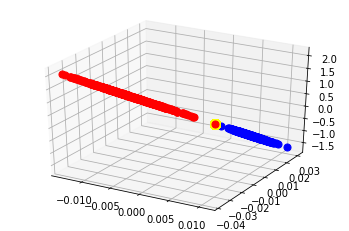

In [124]:
#Projecting onto vecto w
from mpl_toolkits.mplot3d import axes3d
X_1d=[]# Points projected onto one dimension
fig = plt.figure()

ax = fig.gca(projection='3d')
mod_w=np.linalg.norm(W) #mod of w
w2=mod_w ** 2

for i in range(0,len(X)):
    xn = X[i]
    yn=Y[i]
    xn = xn[:,None]
    point= (result[1]/w2)* W
    ax.scatter(point[0],point[1],point[2], s=100,c='yellow')
    projection = W.T.dot(X[i])   
    point= (projection/w2)* W
    if (yn==0) :
        ax.scatter(point[0],point[1],point[2], s=50,c=color[0])
    elif (yn==1) :
        ax.scatter(point[0],point[1],point[2], s=50,c=color[1])